# Projectile motion in a rotating cylinder

In several popular science fiction novels spacecraft capable of supporting entire populations have
been envisioned as large, rotating toroids or cylinders. Consider a cylinder of radius $R = 1000$ km
and, for our purposes here, infinite length. Let it rotate about its axis with an angular velocity of
$\omega = 0.18$ deg/s. It completes one revolution every $2000$ s. This rotation rate leads to an apparent
centrifugal acceleration for objects on the interior surface of $\omega^2R$ equal to $1g$.

Find the trajectory $h$ versus $\phi$′ of a projectile fired vertically upward with a velocity $v' = \omega R$cylindrical coordinates rotating with the cylinder. $h = R-r'$ is the altitude of the projectile and $\phi'$ is its angular position in azimuth relative to the launch point. Calculate the angle $\Phi$ where it lands relative to the launch point. Also, calculate the maximum height $H$ reached by the projectile.

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

R = 1000 #radius [km]
w = 0.18 * np.pi/180 #angular velocity [rad/s]
T = 2000 #period [s]

/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7875/3729689778.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [14]:
def dy_dt(state, t, omega, fcf):
    r, dr_dt, phi, dphi_dt = state
    eps = 1e-12
    
    if abs(r) < eps: r = eps; 
    dydt = [dr_dt, 2.*omega*r*dphi_dt + r*(fcf*omega**2 + dphi_dt**2), dphi_dt, -(2.*dr_dt/r)*(omega + dphi_dt)]
    
    return dydt

In [16]:
v_ = R * w
t = np.linspace(0, 10000, 10000)

fcf = 1 #centrifugal force on
y0 = [R, -v_, 0., 0.]
sol = odeint(dy_dt, y0, t, args=(w,fcf))

indices = np.where(np.abs(sol[1:, 0]) >= R)[0]
if len(indices) > 0:
    k = indices[1]
else: 
    print('Error. Try increasing t_end');

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7875/1329529353.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi\' [rad]$')


Final angle: 0.5708 rad = 32.7039°
Max height: 292.8930 km


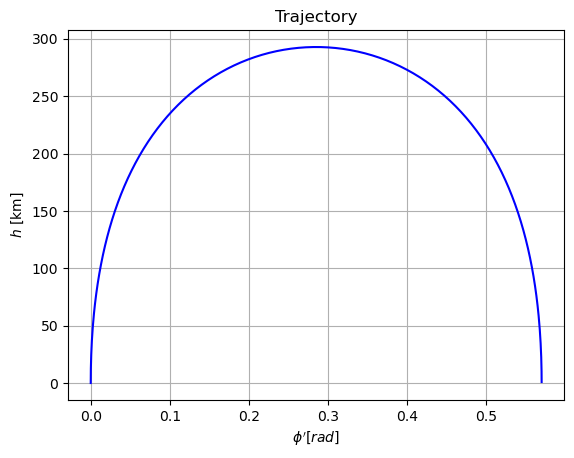

In [18]:
h = R - sol[0:k, 0]

plt.figure(1)
ax = plt.axes()
plt.plot(sol[0:k, 2], h, 'b')
plt.ylabel('$h$ [km]')
plt.xlabel('$\phi\' [rad]$')
plt.grid()
plt.title("Trajectory")
print(f'Final angle: {sol[k, 2]:.4f} rad = {sol[k, 2] * 180/np.pi:.4f}°')
print(f'Max height: {max(h):.4f} km')

<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7875/1703867613.py:11: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$x\ [km]$')
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7875/1703867613.py:12: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$y\ [km]$')


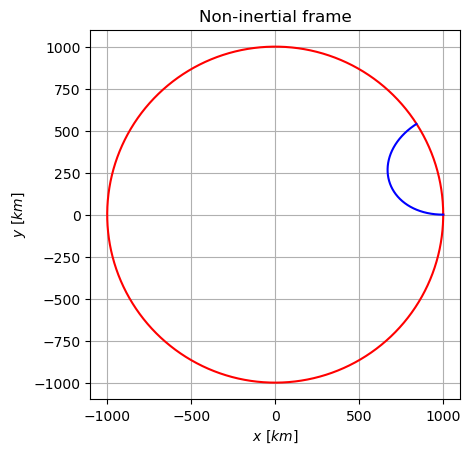

In [24]:
plt.figure(1)
ax = plt.axes()
phi = np.linspace(0,2.*np.pi,R)
ax.set_aspect(1)
xcirc = R*np.cos(phi)
ycirc = R*np.sin(phi)
plt.plot(xcirc, ycirc, 'r')
# Plotting the trajectory
plt.plot(sol[0:k,0]*np.cos(sol[0:k,2]), sol[0:k,0]*np.sin(sol[0:k,2]), 'b')
plt.title("Non-inertial frame")
plt.xlabel('$x\ [km]$')
plt.ylabel('$y\ [km]$')
plt.grid()